In [93]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, r2_score
import numpy as np
import gradio as gr

In [94]:
# Load the dataset
file_path = 'cars.csv'  # Replace with your file path
car_data = pd.read_csv(file_path)

In [95]:
# Displaying the first few rows of the dataset
print(car_data.head())

# Statistical Summary of Numerical Features
# print(car_data.describe())

# Checking for missing values
# print(car_data.isnull().sum())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  car_age    brand              model  \
0  Individual       Manual   First Owner       16   Maruti             800 AC   
1  Individual       Manual   First Owner       16   Maruti  Wagon R LXI Minor   
2  Individual       Manual   First Owner       11  Hyundai       Verna 1.6 SX   
3  Individual       Manual   First Owner        6   Datsun    RediGO T Option   
4  Individual       Manual  Second Owner        9    Honda    Amaze VX i-DTEC   

  km_driven_bin  
0        Medium  
1           Low  
2        Medium  
3           Lo

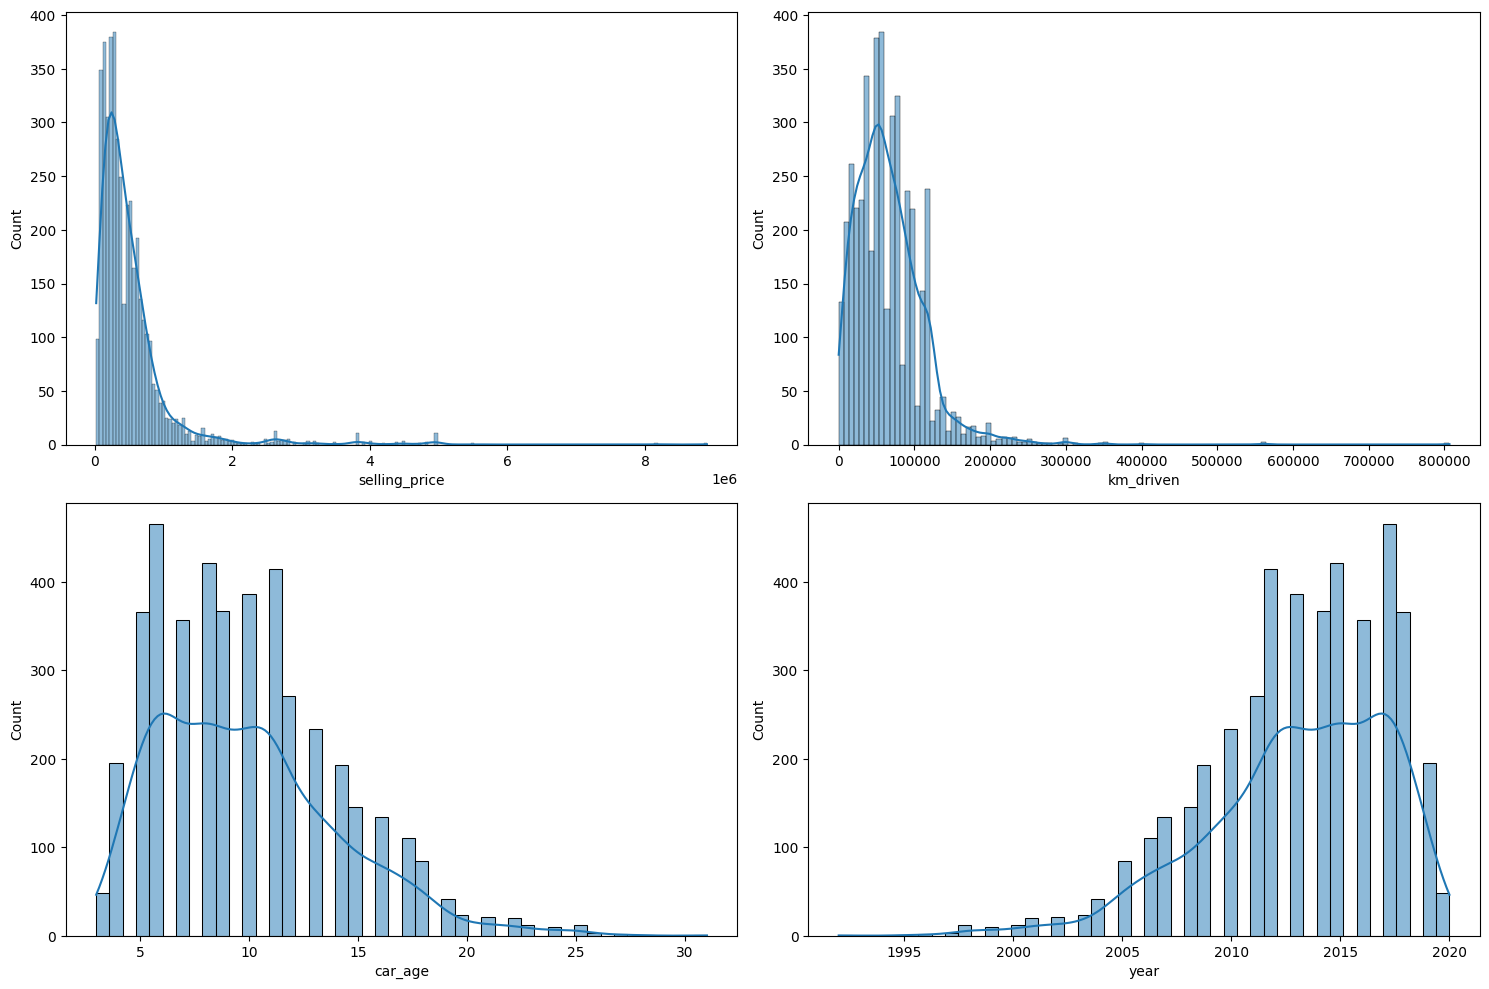

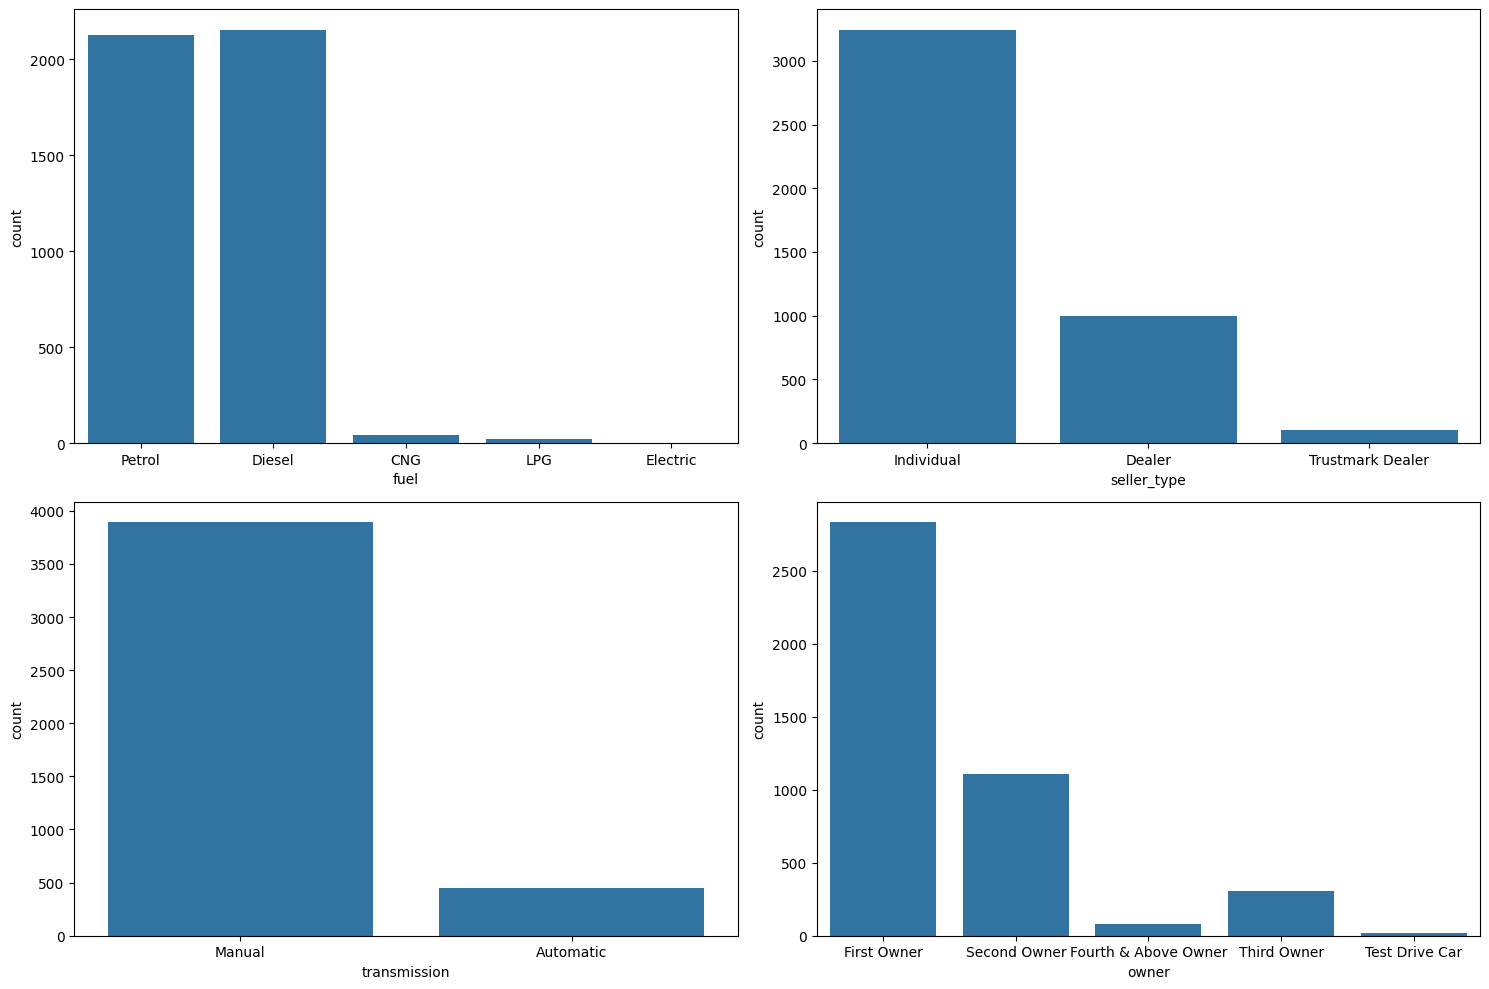

In [4]:
# Plotting histograms for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.histplot(car_data['selling_price'], ax=axes[0, 0], kde=True)
sns.histplot(car_data['km_driven'], ax=axes[0, 1], kde=True)
sns.histplot(car_data['car_age'], ax=axes[1, 0], kde=True)
sns.histplot(car_data['year'], ax=axes[1, 1], kde=True)
plt.tight_layout()
plt.show()

# Plotting count plots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x='fuel', data=car_data, ax=axes[0, 0])
sns.countplot(x='seller_type', data=car_data, ax=axes[0, 1])
sns.countplot(x='transmission', data=car_data, ax=axes[1, 0])
sns.countplot(x='owner', data=car_data, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
# correlation_matrix = car_data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()


In [96]:
# Data Preprocessing
X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression R-squared:", linear_r2)

# Random Forest
random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X_train, y_train)
forest_pred = random_forest.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)
print("Random Forest RMSE:", forest_rmse)
print("Random Forest R-squared:", forest_r2)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(random_state=0)
gradient_boosting.fit(X_train, y_train)
boosting_pred = gradient_boosting.predict(X_test)
boosting_rmse = np.sqrt(mean_squared_error(y_test, boosting_pred))
boosting_r2 = r2_score(y_test, boosting_pred)
print("Gradient Boosting RMSE:", boosting_rmse)
print("Gradient Boosting R-squared:", boosting_r2)

Linear Regression RMSE: 292432.4867708471
Linear Regression R-squared: 0.7697146025388689
Random Forest RMSE: 223162.6785985808
Random Forest R-squared: 0.8658908850898932
Gradient Boosting RMSE: 232290.3996105728
Gradient Boosting R-squared: 0.8546959607127722


In [98]:
# Define functions for each model
def predict_linear(data):
    preprocessed_data = preprocessor.transform(pd.DataFrame(data))
    return linear_reg.predict(preprocessed_data)

def predict_random_forest(data):
    preprocessed_data = preprocessor.transform(pd.DataFrame(data))
    return random_forest.predict(preprocessed_data)

def predict_gradient_boosting(data):
    preprocessed_data = preprocessor.transform(pd.DataFrame(data))
    return gradient_boosting.predict(preprocessed_data)


# Placeholder main function where you choose the model based on the dropdown selection
def your_main_function(model_name, name, year, km_driven, fuel, seller_type, transmission, owner, car_age, km_driven_bin, model, brand):
    input_data = {
        'name': [name],
        'year': [year],
        'km_driven': [km_driven],
        'fuel': [fuel],
        'seller_type': [seller_type],
        'transmission': [transmission],
        'owner': [owner],
        'car_age': [car_age],
        'km_driven_bin': [km_driven_bin],
        'model': [model],
        'brand': [brand],
    }

    if model_name == "Random Forest":
        return predict_random_forest(input_data)
    elif model_name == "Linear Regression":
        return predict_linear(input_data)
    elif model_name == "Gradient Boosting":
        return predict_gradient_boosting(input_data)
    else:
        return "Invalid model selection"


# Gradio interface setup
iface = gr.Interface(
    fn=your_main_function,
    inputs=[
        gr.Dropdown(['Random Forest', 'Linear Regression', 'Gradient Boosting'], label="Select Model"),
        gr.Textbox(label="Name"),
        gr.Number(label="Year"),
        gr.Number(label="Milage"),
        gr.Dropdown(['Petrol', 'Diesel'], label="Fuel"),
        gr.Dropdown(['Individual', 'Dealer'], label="Seller Type"),
        gr.Dropdown(['Manual', 'Automatic'], label="Transmission"),
        gr.Dropdown(['First Owner', 'Second Owner'], label="Owner"),
        gr.Number(label="Car Age"),
        gr.Dropdown(['Low', 'Medium', 'High'], label="KM Driven Bin"),
        gr.Textbox(label="Model"),
        gr.Textbox(label="Brand"),
    ],
    outputs="text"
)

iface.launch()


Running on local URL:  http://127.0.0.1:7892

To create a public link, set `share=True` in `launch()`.
